In [ ]:
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import seaborn as sb
from sklearn import model_selection
from sklearn.metrics import mean_squared_error , r2_score
import os
seed=0

plt.style.use('fivethirtyeight')

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 13.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


     |████████████████████████████████| 109 kB 15.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 12, 17)

# Dataset review
df = web.DataReader("AAPL", 'yahoo', start, end)
df

In [ ]:
dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
df['dates'] = dates

print(df.head(10))
print(df.tail(10))

                 High        Low       Open  ...       Volume  Adj Close       dates
Date                                         ...                                    
2012-01-03  14.732143  14.607143  14.621429  ...  302220800.0  12.610315  2012-01-03
2012-01-04  14.810000  14.617143  14.642857  ...  260022000.0  12.678085  2012-01-04
2012-01-05  14.948214  14.738214  14.819643  ...  271269600.0  12.818838  2012-01-05
2012-01-06  15.098214  14.972143  14.991786  ...  318292800.0  12.952841  2012-01-06
2012-01-09  15.276786  15.048214  15.196429  ...  394024400.0  12.932299  2012-01-09
2012-01-10  15.214286  15.053571  15.211071  ...  258196400.0  12.978598  2012-01-10
2012-01-11  15.101786  14.975357  15.095714  ...  215084800.0  12.957439  2012-01-11
2012-01-12  15.103571  14.955357  15.081429  ...  212587200.0  12.921870  2012-01-12
2012-01-13  15.016071  14.952143  14.989286  ...  226021600.0  12.873419  2012-01-13
2012-01-17  15.213929  15.105714  15.150000  ...  242897200.0  13

In [ ]:
df.reset_index(inplace=True)
print(df.describe())

              High          Low  ...        Volume    Adj Close
count  2003.000000  2003.000000  ...  2.003000e+03  2003.000000
mean     31.798525    31.238634  ...  2.384275e+08    29.523361
std      12.507078    12.308627  ...  1.875556e+08    12.795978
min      14.271429    13.753571  ...  4.544800e+07    12.152316
25%      21.662499    21.228750  ...  1.104316e+08    18.624002
50%      28.504999    27.915001  ...  1.747996e+08    26.091917
75%      41.484999    40.531250  ...  2.992836e+08    39.260998
max      70.442497    69.699997  ...  1.506120e+09    69.177261

[8 rows x 6 columns]


In [ ]:
df.describe(include=np.object)

,dates
count,2003
unique,2003
top,2012-01-03
freq,1


In [ ]:
corr = df.corr(method='pearson')
print(corr)

               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.999646  0.999775  0.999739 -0.559032   0.999139
Low        0.999646  1.000000  0.999709  0.999763 -0.567760   0.999149
Open       0.999775  0.999709  1.000000  0.999480 -0.562159   0.998855
Close      0.999739  0.999763  0.999480  1.000000 -0.563906   0.999379
Volume    -0.559032 -0.567760 -0.562159 -0.563906  1.000000  -0.570675
Adj Close  0.999139  0.999149  0.998855  0.999379 -0.570675   1.000000


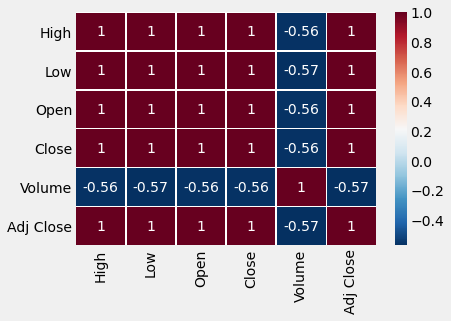

In [ ]:
# Visulize correlation
corr_visual = sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.5)

***Explanatory Data Analysis***

         Date       High       Open        Low      Close
0  2012-01-03  14.732143  14.621429  14.607143  14.686786
1  2012-01-04  14.810000  14.642857  14.617143  14.765714
2  2012-01-05  14.948214  14.819643  14.738214  14.929643
3  2012-01-06  15.098214  14.991786  14.972143  15.085714
4  2012-01-09  15.276786  15.196429  15.048214  15.061786
5  2012-01-10  15.214286  15.211071  15.053571  15.115714
6  2012-01-11  15.101786  15.095714  14.975357  15.091071
7  2012-01-12  15.103571  15.081429  14.955357  15.049643
8  2012-01-13  15.016071  14.989286  14.952143  14.993214
9  2012-01-17  15.213929  15.150000  15.105714  15.167857
10 2012-01-18  15.338214  15.248571  15.225000  15.325357
11 2012-01-19  15.406071  15.362500  15.232500  15.276786
12 2012-01-20  15.267857  15.267500  14.991071  15.010714
13 2012-01-23  15.301786  15.095357  15.082143  15.264643
14 2012-01-24  15.182143  15.182143  14.983929  15.014643
15 2012-01-25  16.230356  16.230000  15.847500  15.952143
16 2012-01-26 

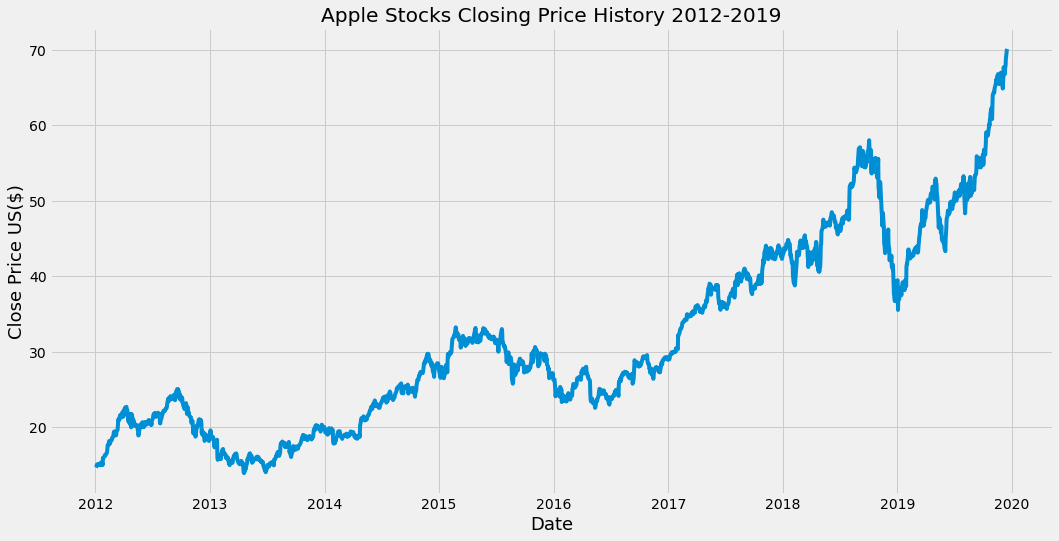

In [ ]:
# Visualize the Dependent variable with Independent Features
appl_df = df[['Date','High','Open','Low','Close']]
print(appl_df.head(20))
plt.figure(figsize=(16,8))
plt.title('Apple Stocks Closing Price History 2012-2019')
plt.plot(appl_df['Date'],appl_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

***Bar plot of Open Price VS Close Price (Year 2012)***

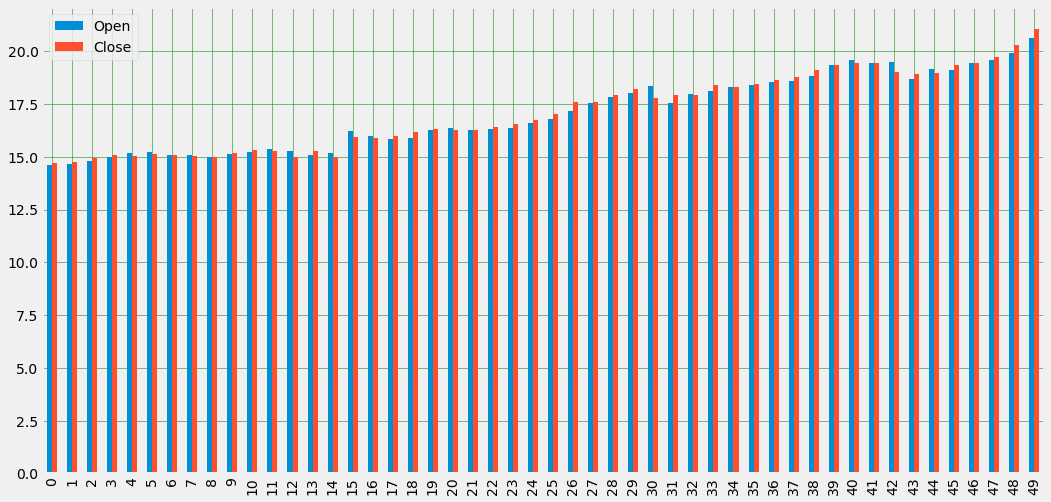

In [ ]:
# Plot Open vs Close (Year 2012)
appl_df[['Open','Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

***Bar plot of Open Price VS Close Price (Year 2019) ***

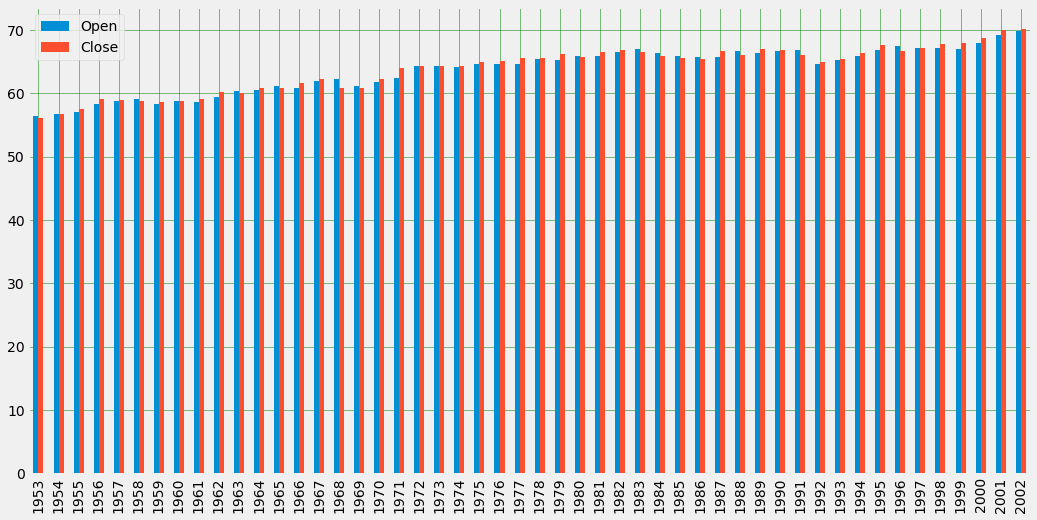

In [ ]:
# Plot Open vs Close (Year 2019)
appl_df[['Open','Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

***Bar plot of High Price of a day VS Close Price (Year 2012)***

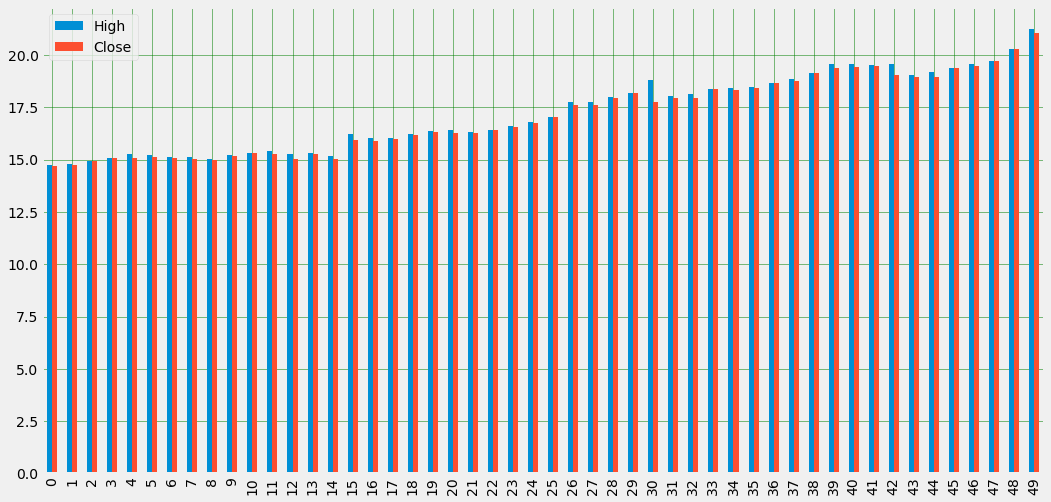

In [ ]:
# Plot High vs Close (Year 2012)
appl_df[['High','Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

***Bar plot of High Price of a day VS Close Price (Year 2019)***

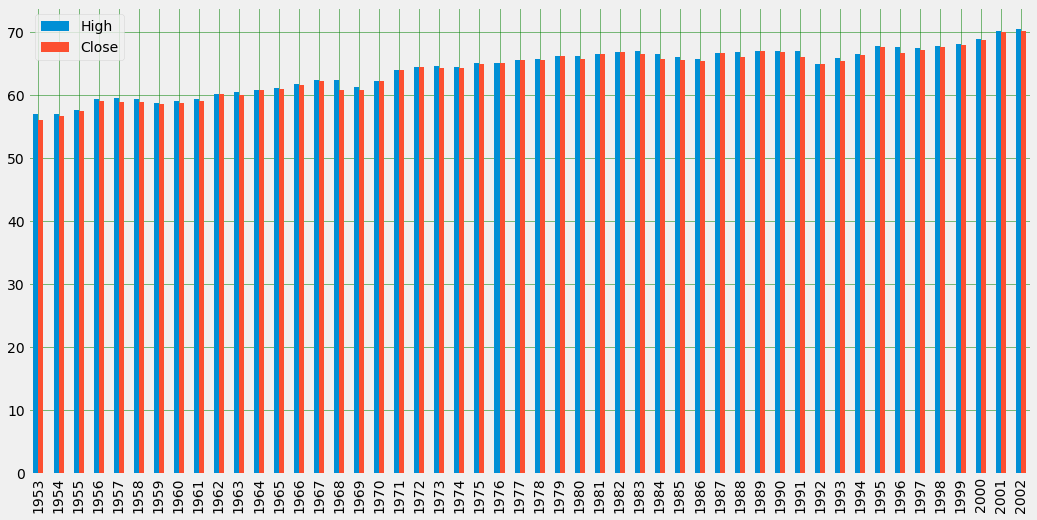

In [ ]:
# Plot High vs Close (Year 2019)
appl_df[['High','Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

***Bar plot of Low Price of a day VS Close Price (Year 2012)***

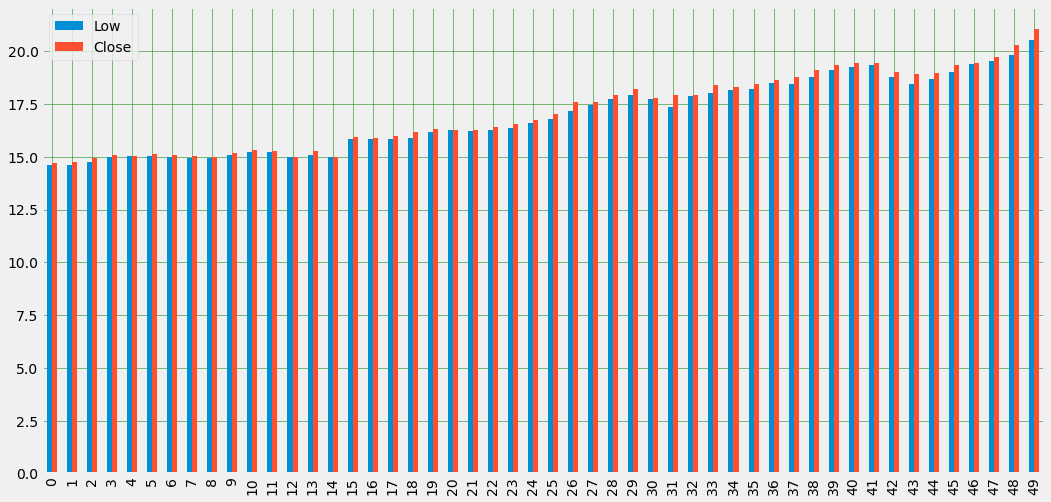

In [ ]:
# Plot Low vs Close (Year 2012)
appl_df[['Low','Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

***Bar plot of Low Price of a day VS Close Price (Year 2019)***

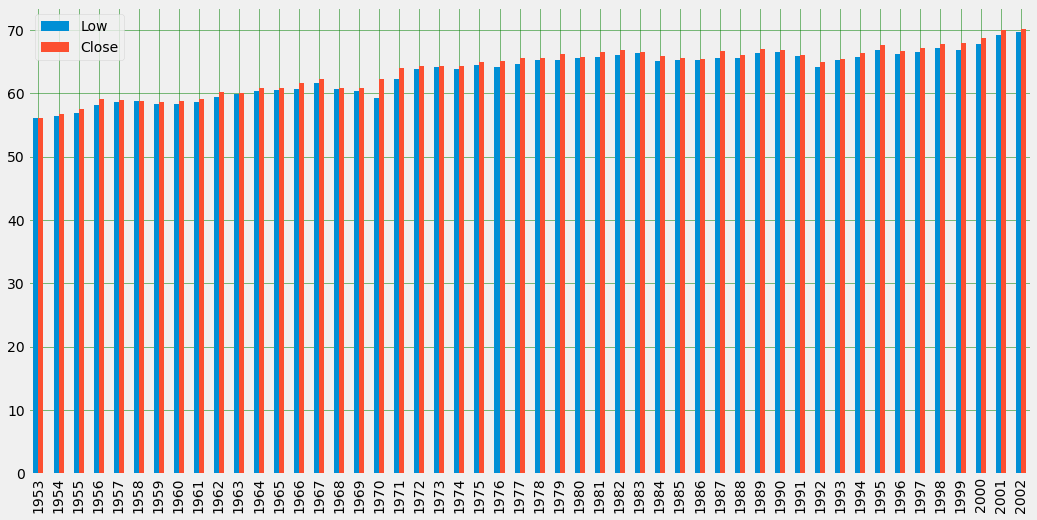

In [ ]:
# Plot Low vs Close (Year 2019)
appl_df[['Low','Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
appl_df['Year'] = df['Date'].dt.year
appl_df['Month'] = df['Date'].dt.month
appl_df['Day'] = df['Date'].dt.day 
# final dataset for model training
final_appl = appl_df[['Day', 'Month', 'Year', 'High', 'Open', 'Low', 'Close']]
print(final_appl.head(10))
print(final_appl.tail(10))

   Day  Month  Year       High       Open        Low      Close
0    3      1  2012  14.732143  14.621429  14.607143  14.686786
1    4      1  2012  14.810000  14.642857  14.617143  14.765714
2    5      1  2012  14.948214  14.819643  14.738214  14.929643
3    6      1  2012  15.098214  14.991786  14.972143  15.085714
4    9      1  2012  15.276786  15.196429  15.048214  15.061786
5   10      1  2012  15.214286  15.211071  15.053571  15.115714
6   11      1  2012  15.101786  15.095714  14.975357  15.091071
7   12      1  2012  15.103571  15.081429  14.955357  15.049643
8   13      1  2012  15.016071  14.989286  14.952143  14.993214
9   17      1  2012  15.213929  15.150000  15.105714  15.167857
      Day  Month  Year       High       Open        Low      Close
1993    4     12  2019  65.827499  65.267502  65.169998  65.434998
1994    5     12  2019  66.472504  65.947502  65.682503  66.394997
1995    6     12  2019  67.750000  66.870003  66.824997  67.677498
1996    9     12  2019  67.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#separate Independent and dependent variable
X = final_appl.iloc[:,final_appl.columns != 'Close']
Y = final_appl.iloc[:, 5]
print(X.shape)  
print(Y.shape)  

(2003, 6)
(2003,)


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)
print(x_train.shape)
print(x_test.shape)   
print(y_train.shape) 
print(y_test.shape)  

(1502, 6)
(501, 6)
(1502,)
(501,)




*KNN: K-nearest neighbor Regression Model*

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors = 4)
knn_model = knn_regressor.fit(x_train,y_train)
y_knn_pred = knn_model.predict(x_test)

In [ ]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=seed, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.62522785648396


Accuracy:  ***99.62522785648396***




***Plot Actual vs Predicted Value of kNN Model***

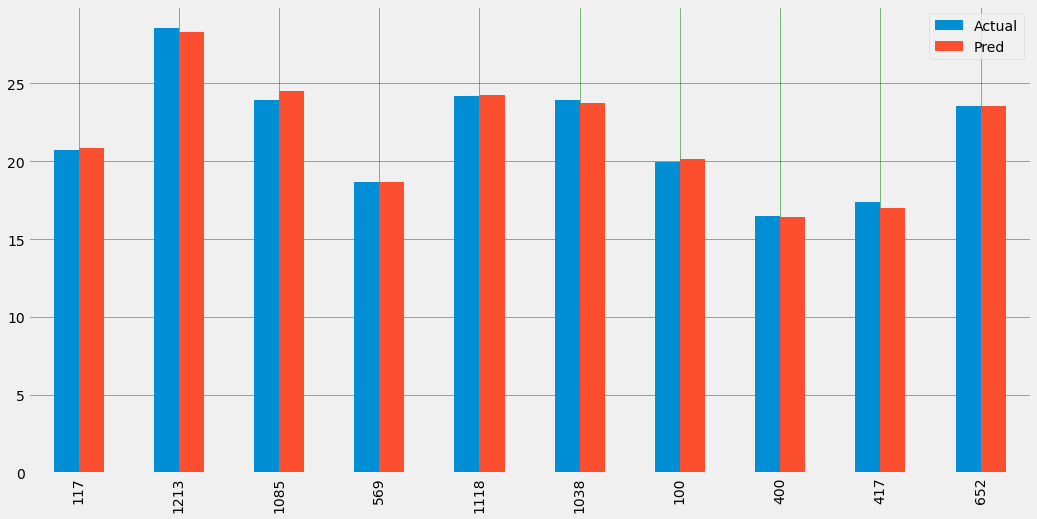

In [ ]:
plot_knn_df = pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(10).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
knn_mse = math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error', knn_mse)
print('KNN R2: ', r2_score(y_test, y_knn_pred))

KNN Model Root mean square error 0.4294833785454349
KNN R2:  0.9987367847038633


***RMSE (Root Mean Square Error)***                                                    
***KNN Model RMSE: 0.4294833785454349***                                
***R-Squared Error***                              
***KNN R-Squared: 0.9987367847038633 ***